In [23]:
import pandas as pd
import plotly.express as px
import numpy as np
import matplotlib.pyplot as plt
import datetime
import itertools
from itertools import groupby

In [24]:
df = pd.read_csv('/Users/lucy/Documents/Vinter/merged_goldeikon.csv')
df.head(5) 

,datetime,close,amount,ex_symbol
0,2021-02-04,173.26,354292.0,l_sgld
1,2021-02-03,177.79,26805.0,l_sgld
2,2021-02-02,177.91,21356.0,l_sgld
3,2021-02-01,180.30,38422.0,l_sgld
4,2021-01-29,179.91,102532.0,l_sgld


In [45]:
df.tail(5)

,datetime,close,amount,ex_symbol
11963,2016-01-08,1072.90,1862.0,s_zgldus
11964,2016-01-07,1076.09,12058.0,s_zgldus
11965,2016-01-06,1060.15,4357.0,s_zgldus
11966,2016-01-05,1046.98,2986.0,s_zgldus
11967,2016-01-04,1048.21,542.0,s_zgldus


# Describe dataset 
Here we get a overview of the data set.

In [25]:
df.describe() 

,close,amount
count,11968.000000,1.196800e+04
mean,253.108282,1.041352e+05
std,385.863657,4.346516e+05
min,21.260000,1.000000e+00
25%,119.560000,3.008250e+03
50%,126.345000,1.163700e+04
75%,155.030000,5.586175e+04
max,1959.000000,1.708597e+07


In [26]:
df.describe(include=[np.object])

,datetime,ex_symbol
count,11968,11968
unique,1305,10
top,2019-08-07,l_sgld
freq,10,1289


In [27]:
df.describe(include='all')

,datetime,close,amount,ex_symbol
count,11968,11968.000000,1.196800e+04,11968
unique,1305,NaN,NaN,10
top,2019-08-07,NaN,NaN,l_sgld
freq,10,NaN,NaN,1289
mean,NaN,253.108282,1.041352e+05,NaN
std,NaN,385.863657,4.346516e+05,NaN
min,NaN,21.260000,1.000000e+00,NaN
25%,NaN,119.560000,3.008250e+03,NaN
50%,NaN,126.345000,1.163700e+04,NaN
75%,NaN,155.030000,5.586175e+04,NaN


# Datetime

In [28]:
x = datetime.datetime.now()
print(x)

2021-03-19 18:25:09.304895


In [29]:
date_object = datetime.date.today()
print(date_object)

2021-03-19


In [37]:
df['datetime'] = pd.to_datetime(df['datetime'])

In [38]:
df.groupby(['ex_symbol', 'datetime']).mean()

close    amount
ex_symbol datetime                     
l_gbsx    2016-01-04   102.54   35927.0
          2016-01-05   102.82   33608.0
          2016-01-06   103.97   64732.0
          2016-01-07   105.51   98517.0
          2016-01-08   105.29  126175.0
...                       ...       ...
s_zgldus  2021-01-29  1767.80    6620.0
          2021-02-01  1770.60    2723.0
          2021-02-02  1751.00    1688.0
          2021-02-03  1748.20    1421.0
          2021-02-04  1703.60    4301.0

[11968 rows x 2 columns]

In [39]:
df['datetime'] = pd.to_datetime(df['datetime'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11968 entries, 0 to 11967
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   datetime   11968 non-null  datetime64[ns]
 1   close      11968 non-null  float64       
 2   amount     11968 non-null  float64       
 3   ex_symbol  11968 non-null  object        
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 374.1+ KB


# exchange traded fund (ETF) 
#here we can see the diffrent names of etf's and it's values

In [32]:
df['ex_symbol'].unique() 

array(['l_sgld', 's_sgld', 'l_igln', 'l_xgld', 's_xgld', 'l_gbsx',
       'l_phau', 's_csgold', 'l_sgbs', 's_zgldus'], dtype=object)

In [12]:
df['ex_symbol'].nunique() 

10

In [13]:
df["ex_symbol"].describe()

count      11968
unique        10
top       l_sgld
freq        1289
Name: ex_symbol, dtype: object

In [14]:
s = pd.Series(['l_sgld', 's_sgld', 'l_igln', 'l_xgld', 's_xgld', 'l_gbsx', 'l_phau', 's_csgold', 'l_sgbs', 's_zgldus'])
s.describe() 

count         10
unique        10
top       s_xgld
freq           1
dtype: object

In [15]:
df["ex_symbol"].value_counts()

l_sgld      1289
l_gbsx      1289
l_phau      1289
l_igln      1289
l_xgld      1289
l_sgbs      1280
s_csgold    1279
s_zgldus    1279
s_sgld      1005
s_xgld       680
Name: ex_symbol, dtype: int64

In [18]:
exsymbol_df = pd.DataFrame( {     
"exsymbol" : ['l_gbsx', 'l_xgld', 'l_igln', 'l_sgld', 'l_phau', 'l_sgbs', 's_csgold', 's_zgldus', 's_sgld', 's_xgld'] ,
"value" : [1289, 1289, 1289, 1289, 1289, 1280, 1279, 1279, 1005, 680]})
df.groupby(['exsymbol']).sum()
exsymbol_df.head()

,exsymbol,value
0,l_gbsx,1289
1,l_xgld,1289
2,l_igln,1289
3,l_sgld,1289
4,l_phau,1289


<AxesSubplot:>

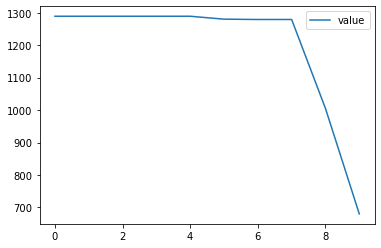

In [41]:
exsymbol_df.plot.line()

<AxesSubplot:ylabel='Frequency'>

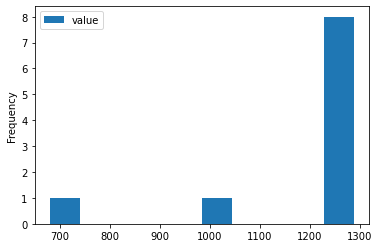

In [46]:
exsymbol_df.plot.hist()

# Matplotlib histogram and linechart

<AxesSubplot:xlabel='ex_symbol'>

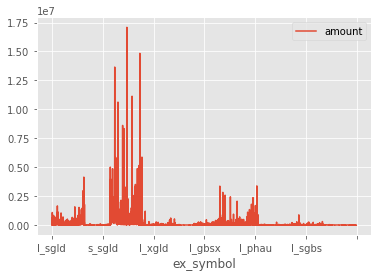

In [134]:
df.plot.line(x ='ex_symbol', y ='amount')

<AxesSubplot:ylabel='Frequency'>

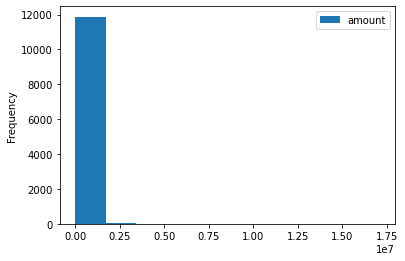

In [33]:
df.plot.hist(x ='ex_symbol', y ='amount')

<AxesSubplot:xlabel='datetime', ylabel='amount'>

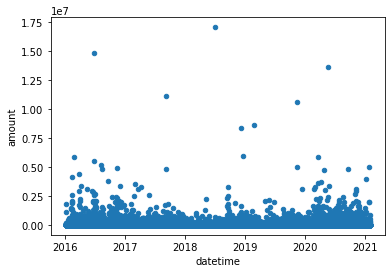

In [51]:
df.plot.scatter(x ='datetime', y ='amount')

<AxesSubplot:xlabel='datetime'>

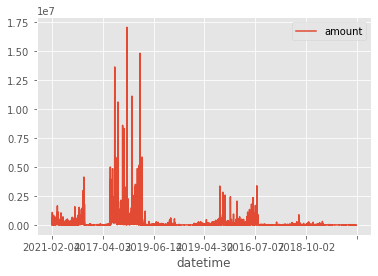

In [135]:
data.plot.line(x ='datetime', y ='amount')

In [136]:
fig = px.line(df, x = 'datetime', y = 'amount', title='Amount / Time')
fig.show()

In [137]:
fig = px.histogram(df, x = 'ex_symbol', y = 'amount', title='Exchange Amount')
fig.show()

Also there are some shortcuts that you might want to know like when you press B, it creates a new box below the one you're in.

You can press **M** after that to select Markdown and have text in your jupyter lab as Im doing now.

To activate edition of a block just *press enter*